In [1]:
# https://www.youtube.com/watch?v=hOLSGMEEwlI
# install the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('bmh')

In [25]:
# load the data
import pandas_datareader
import datetime
import pandas_datareader.data as web
start = datetime.datetime(2019, 4, 18)
end = datetime.datetime(2020, 4, 18)
df = web.DataReader('NFLX', 'yahoo', start, end)

In [26]:
# show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-04-18,360.410004,351.640015,355.000000,360.350006,8353200,360.350006
2019-04-22,377.690002,359.000000,359.700012,377.339996,11980500,377.339996
2019-04-23,384.799988,374.709991,375.450012,381.890015,10089800,381.890015
2019-04-24,381.899994,373.269989,381.070007,374.230011,6541900,374.230011
2019-04-25,374.760010,365.700012,374.489990,368.329987,6255500,368.329987
...,...,...,...,...,...,...
2020-04-13,400.510010,367.700012,371.309998,396.720001,11692900,396.720001
2020-04-14,417.820007,394.850006,397.500000,413.549988,11581000,413.549988
2020-04-15,434.980011,412.250000,413.000000,426.750000,13561200,426.750000


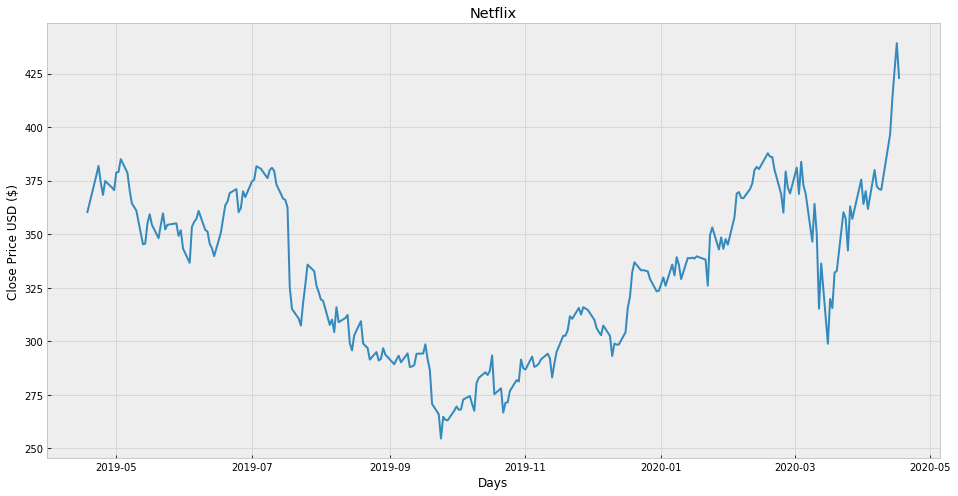

In [27]:
# visualize the closing price
plt.figure(figsize=(16, 8))
plt.title('Netflix')
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df.Close)
plt.show()

In [28]:
# get the Close price
df = df[['Close']]
df

,Close
Date,
2019-04-18,360.350006
2019-04-22,377.339996
2019-04-23,381.890015
2019-04-24,374.230011
2019-04-25,368.329987
...,...
2020-04-13,396.720001
2020-04-14,413.549988
2020-04-15,426.750000


In [31]:
# create a variable to predict 'x' days out into the future
days = 25
# create a target column, shifted 'x' days out
df['Prediction'] = df[['Close']].shift(-days)
df

/Users/My/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Close,Prediction
Date,,
2019-04-18,360.350006,354.390015
2019-04-22,377.339996,355.059998
2019-04-23,381.890015,349.190002
2019-04-24,374.230011,351.850006
2019-04-25,368.329987,343.279999
...,...,...
2020-04-13,396.720001,NaN
2020-04-14,413.549988,NaN
2020-04-15,426.750000,NaN


In [32]:
# create a feature dataset (X) and convert it to a numpy array and remove the last 'x' rows
X = np.array(df.drop(['Prediction'], 1))[:-days]
X

array([[360.3500061 ],
       [377.33999634],
       [381.89001465],
       [374.23001099],
       [368.32998657],
       [374.8500061 ],
       [371.82998657],
       [370.54000854],
       [378.80999756],
       [379.05999756],
       [385.02999878],
       [378.67001343],
       [370.45999146],
       [364.36999512],
       [362.75      ],
       [361.04000854],
       [345.26000977],
       [345.60998535],
       [354.98999023],
       [359.30999756],
       [354.45001221],
       [348.10998535],
       [354.26998901],
       [359.73001099],
       [352.20999146],
       [354.39001465],
       [355.05999756],
       [349.19000244],
       [351.8500061 ],
       [343.27999878],
       [336.63000488],
       [353.3999939 ],
       [355.73001099],
       [357.13000488],
       [360.86999512],
       [352.01000977],
       [351.26998901],
       [345.55999756],
       [343.42999268],
       [339.73001099],
       [350.61999512],
       [357.11999512],
       [363.51998901],
       [365

In [33]:
# create the target dataset (y) and convert it to a numpy array and get all of the target values except for the last 'n' rows
y = np.array(df['Prediction'])[:-days]
y

array([354.39001465, 355.05999756, 349.19000244, 351.8500061 ,
       343.27999878, 336.63000488, 353.3999939 , 355.73001099,
       357.13000488, 360.86999512, 352.01000977, 351.26998901,
       345.55999756, 343.42999268, 339.73001099, 350.61999512,
       357.11999512, 363.51998901, 365.20999146, 369.20999146,
       371.04000854, 360.29998779, 362.20001221, 370.01998901,
       367.32000732, 374.6000061 , 375.42999268, 381.72000122,
       380.54998779, 376.16000366, 379.92999268, 381.        ,
       379.5       , 373.25      , 366.6000061 , 365.98999023,
       362.44000244, 325.20999146, 315.1000061 , 310.61999512,
       307.29998779, 317.94000244, 326.45999146, 335.77999878,
       332.70001221, 325.92999268, 322.98999023, 319.5       ,
       318.82998657, 307.63000488, 310.1000061 , 304.29000854,
       315.8999939 , 308.92999268, 310.82998657, 312.27999878,
       299.10998535, 295.76000977, 302.79998779, 309.38000488,
       298.98999023, 297.80999756, 296.92999268, 291.44

In [34]:
# split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [36]:
# create the models
tree = DecisionTreeRegressor().fit(x_train, y_train)
linear = LinearRegression().fit(x_train, y_train)

In [37]:
# get the last 'x' rows of the feature dataset
x_future = df.drop(['Prediction'], 1)[:-days]
x_future = x_future.tail(days)
x_future = np.array(x_future)
x_future

array([[366.95001221],
       [366.76998901],
       [371.07000732],
       [373.69000244],
       [380.01000977],
       [381.3999939 ],
       [380.3999939 ],
       [387.77999878],
       [386.19000244],
       [386.        ],
       [380.07000732],
       [368.70001221],
       [360.08999634],
       [379.23999023],
       [371.70999146],
       [369.02999878],
       [381.04998779],
       [368.76998901],
       [383.79000854],
       [372.77999878],
       [368.97000122],
       [346.48999023],
       [364.13000488],
       [349.92001343],
       [315.25      ]])

In [38]:
# show the decision tree prediction
tree_predict = tree.predict(x_future)
tree_predict

array([336.29998779, 298.83999634, 319.75      , 315.47000122,
       357.11999512, 315.8999939 , 360.26998901, 357.32000732,
       342.39001465, 362.98999023, 357.11999512, 372.27999878,
       322.98999023, 360.86999512, 370.07998657, 361.76000977,
       379.95999146, 372.27999878, 371.11999512, 370.72000122,
       396.72000122, 413.54998779, 343.42999268, 439.17001343,
       422.95999146])

In [39]:
# show the linear regression prediction
linear_predict = linear.predict(x_future)
linear_predict

array([350.92522949, 350.81864456, 353.36452272, 354.9157227 ,
       358.65755992, 359.48051693, 358.88845477, 363.25787644,
       362.31649976, 362.20400651, 358.6930822 , 351.96133827,
       346.86367364, 358.20166049, 353.74343311, 352.15671084,
       359.27329156, 352.00276889, 360.89555418, 354.37694396,
       352.12118855, 338.81162458, 349.25560984, 340.84241153,
       320.31560832])

In [44]:
def visualize(data, features, predict):
    valid = data[features.shape[0]:]
    valid['Predictions'] = predict
    plt.figure(figsize=(16, 8))
    plt.title('Model')
    plt.xlabel('Days')
    plt.ylabel('Close Price USD ($)')
    plt.plot(data.Close)
    plt.plot(valid[['Close', 'Predictions']])
    plt.legend(['Original', 'Validation', 'Predictions'])
    plt.show()

/Users/My/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


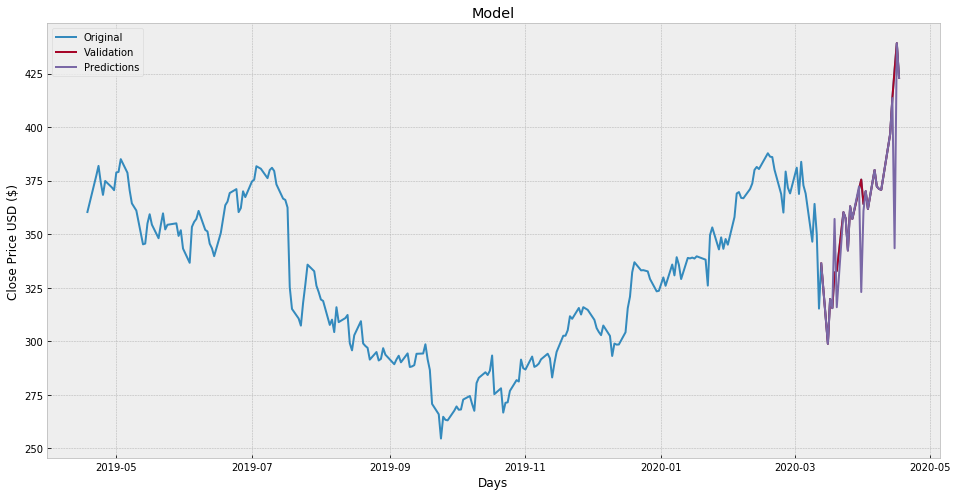

In [46]:
visualize(df, X, tree_predict)

/Users/My/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


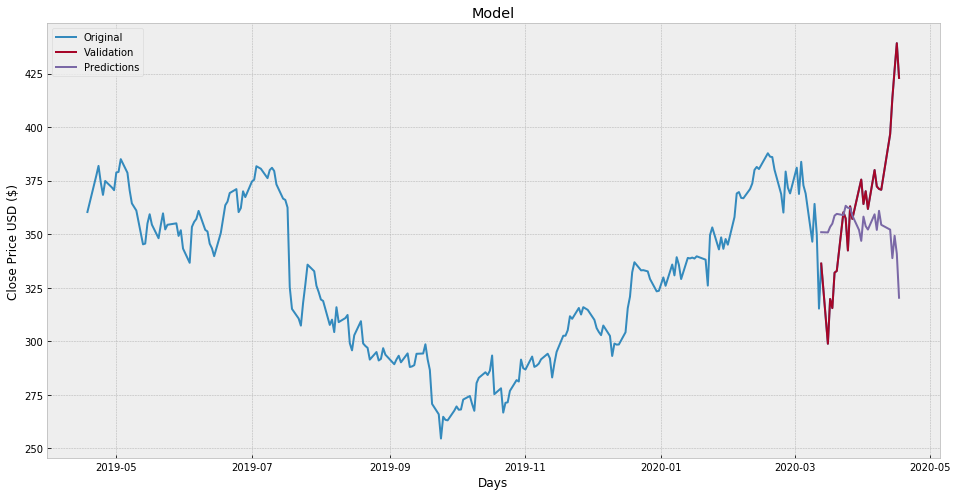

In [47]:
visualize(df, X, linear_predict)